In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation


%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets

my_crypto = {
    "crypto": [1.2, 5.3]
}

tickers = ["my_btc", "my_eth"]
df_crypto = pd.DataFrame(my_crypto, index=tickers)

# define my_btc and my_eth
my_btc = df_crypto.loc["my_btc"]["crypto"]
my_eth = df_crypto.loc["my_eth"]["crypto"]

df_crypto


,crypto
my_btc,1.2
my_eth,5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price

response = requests.get("https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD")
BTC_price = response.json()
print(BTC_price['data']['1']['quotes']['USD']['price'])
btc_price = float(BTC_price['data']['1']['quotes']['USD']['price'])

# Fetch crrent ETH price                         

ETH_url = requests.get(eth_url)
ETH_price = ETH_url.json()
print(ETH_price['data']['1027']['quotes']['USD']['price'])

eth_price = float(ETH_price['data']['1027']['quotes']['USD']['price'])

# Compute current value of my crpto

my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth



# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")


58057.0
1797.26
The current value of your 1.2 BTC is $69668.40
The current value of your 5.3 ETH is $9525.48


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_shares = {
    "shares": [50, 200]
}

tickers = ["my_spy", "my_agg"]
df_shares = pd.DataFrame(my_shares, index=tickers)
my_spy = df_shares.loc["my_spy"]["shares"]
my_agg = df_shares.loc["my_agg"]["shares"]
df_shares

,shares
my_spy,50
my_agg,200


In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2021-03-17", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                        SPY  \
                             open      high     low   close   volume    open   
2021-03-17 00:00:00-04:00  113.55  113.9778  113.48  113.87  5023810  394.53   

                                                            
                             high    low   close    volume  
2021-03-17 00:00:00-04:00  398.12  393.3  397.22  61876016

In [9]:
# Pick AGG and SPY close prices
spy_close_price = float(df_portfolio["SPY"]["close"])
agg_close_price = float(df_portfolio["AGG"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $113.87
Current SPY closing price: $397.22


In [10]:
# Compute the current value of shares
my_spy_value = spy_close_price * df_shares.loc["my_spy"]["shares"]
my_agg_value = agg_close_price* df_shares.loc["my_agg"]["shares"]

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19861.00
The current value of your 200 AGG shares is $22774.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
saving_data = [
    my_btc_value + my_eth_value,
    my_spy_value + my_agg_value,
]

df_savings = pd.DataFrame(saving_data, columns=["amount"], index = ["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,79193.878
shares,42635.000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a4dc45790>],
      dtype=object)

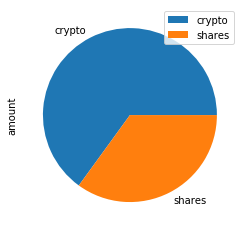

In [12]:
# Plot savings pie chart
df_savings.plot.pie(subplots=True)

In [13]:
# Set ideal emergency fund

emergency_fund = monthly_income * 3

# Calculate total amount of savings 

total_saving = (my_btc_value + my_eth_value) * (my_spy_value + my_agg_value)

# Validate saving health
if total_saving > emergency_fund:
    
    print("congratulating you for having enough money in this fund.")

elif total_saving == emergency_fund:
    print("congratulating you on reaching this financial goal.")

else:
    print("You nedd more money for your goal")
    

congratulating you for having enough money in this fund.


# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
# Set the ticker
tickers = ["AGG", "SPY"]

# Set timeframe to '1D'
timeframe = "1D"


df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_stock_data.head()

AGG                                          \
                             open      high       low    close     volume   
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   

                              SPY                                      
                             open    high     low   close      volume  
2016-08-17 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2016-08-18 00:00:00-04:00  218.33  218.90  218.21  218.87  42850145.0  
2016-08-19 00:00:00-04:00  218.31  218.75  217.74  218.57  52238224.0  
2016-08-22 00:00:00-04:00  218.27  218.80  217.83  218.50  48628907.0  
2016-08-23 00:00:00-04:00  219.25  219.60  218.90  218.94  41981207.0

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stock = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = 500,
    num_trading_days = 252*30,
    weights = [.4, .6]
)

In [18]:
# Printing the simulation input data
MC_stock.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2016-08-17 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2016-08-18 00:00:00-04:00     0.001110  218.33  218.90  218.21  218.87   
2016-08-19 00:00:00-04:00    -0.001908  218.31  218.75  217.74  218.57   
2016-08-22 00:00:00-04:00     0.001422  218.27  218.80  217.83  218.50   
2016-08-23 00:00:00-04:00     0.000355  219.25  219.60  218.90  218.94   

                                                    
                               volume daily_return  
2016-08-17 00:00:00-04:00         NaN          NaN  
2016-08-18 00:00:00-04:00  42850145.0          NaN  
2016-08-19 00:00:00-04:00  52238224.0    -0.001371  
2016-08-22 00:00:00-04:00  48628907.0    -0.000320  
2016-08-23 00:00:00-04:00  41981207.0     0.002014

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stock.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008232,0.998380,1.010033,1.002112,0.999040,0.987595,0.988067,1.008097,1.002940,1.008801,...,0.996749,1.008923,1.016954,1.002363,0.991366,0.998814,1.001743,0.987797,1.003498,0.983048
2,1.004492,0.993628,1.004828,0.997462,1.004546,0.985038,0.988706,1.010193,1.004320,1.004215,...,0.995702,1.002859,1.019448,1.011098,0.997067,1.007866,1.002542,0.984143,0.990420,0.972930
3,0.998167,0.989901,1.006615,1.003133,1.020498,0.983880,0.989870,1.004218,1.006841,0.995236,...,0.990622,0.997728,1.026570,1.015046,1.000238,1.017172,1.003664,0.982201,0.996976,0.979315
4,0.993831,0.987238,1.017116,1.008265,1.019675,0.996708,1.006979,1.002665,1.015603,0.999104,...,0.990882,1.000241,1.029836,1.024130,1.014912,1.007022,0.996037,0.985800,0.991668,0.981210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.718190,15.156566,3.913499,8.733211,9.741022,10.538438,13.175407,2.624208,3.257768,7.236915,...,3.761943,10.714695,10.448563,26.192368,15.442050,13.370957,12.687046,8.044628,6.177921,5.877352
7557,4.658203,15.112990,3.903916,8.734022,9.585628,10.454622,13.208750,2.622229,3.296972,7.223539,...,3.724705,10.649952,10.570750,25.872281,15.348212,13.444073,12.695503,7.965811,6.200613,5.851457
7558,4.595768,15.063196,3.917455,8.761147,9.583224,10.412120,13.183678,2.640920,3.327148,7.173634,...,3.760037,10.687940,10.754437,26.327027,15.543663,13.380298,12.763602,7.922553,6.189725,5.747930
7559,4.602138,14.943604,3.920628,8.872698,9.523078,10.350479,13.226590,2.650865,3.316841,7.107098,...,3.743968,10.703210,10.827916,26.099152,15.596630,13.358862,12.721128,7.985076,6.237622,5.796306


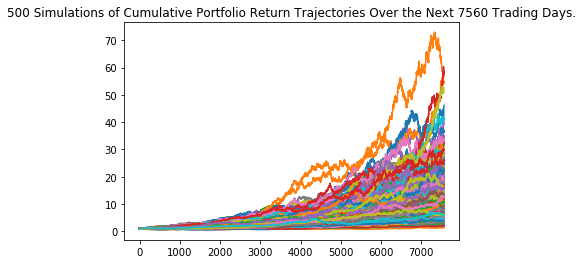

In [21]:
# Plot simulation outcomes
line_plot = MC_stock.plot_simulation()

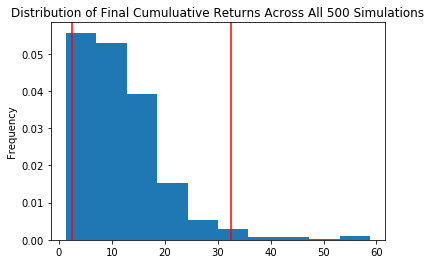

In [22]:
# Plot probability distribution and confidence intervals
dist_plot = MC_stock.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics = MC_stock.summarize_cumulative_return()

# Print summary statistics
print(summary_statistics)

count           500.000000
mean             11.885601
std               8.119220
min               1.312213
25%               6.000976
50%              10.090930
75%              15.459512
max              58.810683
95% CI Lower      2.435530
95% CI Upper     32.597765
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower = round(summary_statistics[8]* initial_investment,2)
ci_upper = round(summary_statistics[9]* initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $48710.6 and $651955.3


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000

ci_lower = round(summary_statistics[8]* initial_investment,2)
ci_upper = round(summary_statistics[9]* initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $73065.89 and $977932.95


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

MC_five_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991567,0.998486,0.999961,1.001405,0.990628,0.992036,0.999860,1.004535,0.996648,1.007510,...,1.013192,1.005696,1.001002,1.003452,1.005698,0.997772,0.996193,1.000080,0.997685,1.008806
2,0.998138,0.998775,0.998240,1.013807,0.984971,0.994924,1.003367,1.001692,0.994761,1.012081,...,1.020192,1.006347,1.006224,1.011963,1.006271,1.003954,1.008865,0.995416,1.001980,1.001696
3,0.999843,1.015687,1.001978,1.004101,0.987183,0.998697,1.012261,0.999976,0.992813,1.008766,...,1.021729,1.001741,0.996225,1.005408,0.987157,1.011456,1.004742,1.002309,0.996655,1.007727
4,1.006156,1.009697,1.009548,0.999074,0.988632,1.009954,1.014217,1.006626,0.988570,1.004266,...,1.022553,1.002008,1.002352,1.010140,0.991166,1.007924,1.010629,1.004516,1.002882,1.008385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3.209206,0.959850,1.940029,1.837952,1.600642,0.948406,0.887314,1.625783,1.188741,1.611356,...,1.525485,0.955836,1.297230,1.649821,2.133665,1.277238,1.570682,1.646680,1.063793,1.069442
1257,3.223411,0.977187,1.954945,1.857849,1.589978,0.946497,0.884797,1.627428,1.173293,1.612859,...,1.504822,0.952667,1.299342,1.647740,2.137640,1.262781,1.594152,1.652307,1.075670,1.063475
1258,3.234178,0.978759,1.968686,1.875495,1.591818,0.944296,0.887273,1.618019,1.187232,1.635116,...,1.493140,0.952863,1.298858,1.638925,2.151646,1.260176,1.612183,1.662863,1.071311,1.061861
1259,3.216807,0.990268,1.997676,1.874050,1.589425,0.952432,0.888317,1.616006,1.204494,1.632412,...,1.495066,0.957787,1.292320,1.615161,2.141519,1.266565,1.595132,1.669145,1.068746,1.057881


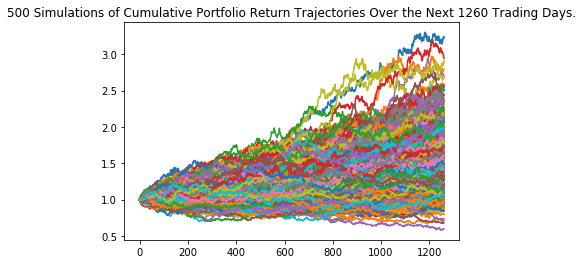

In [28]:
# Plot simulation outcomes
line_plot = MC_five_years.plot_simulation()

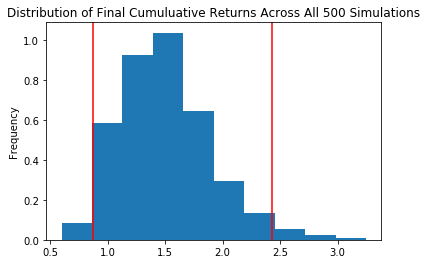

In [29]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five_years.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
five_years = MC_five_years.summarize_cumulative_return()

# Print summary statistics
print(five_years)

count           500.000000
mean              1.506400
std               0.400365
min               0.599980
25%               1.205068
50%               1.463178
75%               1.753116
max               3.245286
95% CI Lower      0.873687
95% CI Upper      2.429317
Name: 1260, dtype: float64


In [31]:
# Set initial investment

initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(five_years[8]* initial_investment,2)
ci_upper_five = round(five_years[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $52421.23 and $145759.03


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997126,1.004289,0.993382,1.006087,0.992354,0.998787,0.988693,0.998782,0.983368,1.002317,...,1.004002,1.006521,0.995645,0.999558,1.010162,1.016189,1.010679,1.000407,1.004747,1.014260
2,1.003102,1.004990,0.995972,1.017738,0.976272,0.992709,0.992539,0.998584,0.990859,1.004250,...,1.005042,1.002034,0.993476,1.014579,1.023836,1.006733,1.011083,0.994917,1.010915,1.004187
3,1.005875,0.997795,1.005262,1.006626,0.965867,0.994842,0.989829,0.993922,0.990280,1.012628,...,0.997192,1.001032,1.003309,1.007221,1.035811,1.016168,1.022751,0.994057,1.007832,0.993233
4,1.007188,0.999091,1.008383,0.998636,0.955560,0.993036,0.981311,1.000020,1.005477,1.014754,...,1.006199,1.004625,1.000435,0.998546,1.031467,1.015749,1.018532,0.998177,1.008340,0.986205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.463405,2.145687,2.998845,2.622402,1.213048,1.093612,4.755561,0.948750,1.770051,2.618117,...,2.442694,2.416413,1.914165,1.023326,3.916531,2.796877,1.326633,2.109575,3.073369,1.205718
2517,4.425856,2.156582,3.025855,2.610420,1.218990,1.089518,4.773815,0.941742,1.751815,2.599432,...,2.481214,2.401191,1.921392,1.030490,3.937020,2.760421,1.309699,2.130518,3.067901,1.205763
2518,4.446608,2.164891,3.006331,2.582146,1.217079,1.091735,4.792212,0.949667,1.749065,2.557889,...,2.472957,2.387303,1.904685,1.026053,3.883766,2.746076,1.328265,2.127324,3.025665,1.198485
2519,4.403204,2.186734,2.989642,2.549576,1.216652,1.091978,4.770998,0.953962,1.746025,2.555691,...,2.460081,2.382193,1.923917,1.029998,3.857270,2.769213,1.332256,2.140539,3.032298,1.196606


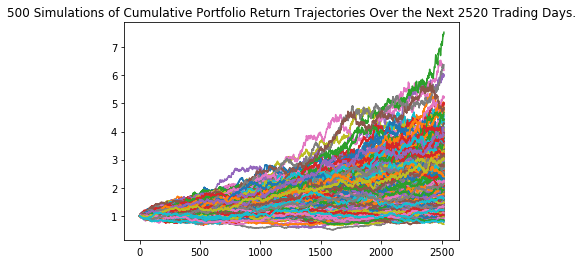

In [34]:
# Plot simulation outcomes
line_plot = MC_ten_years.plot_simulation()

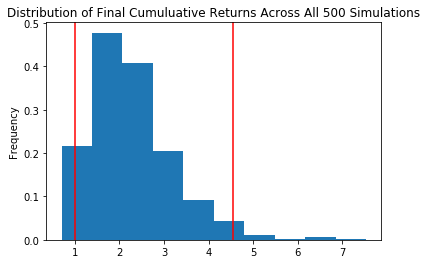

In [35]:
# Plot probability distribution and conMC_ten_yearse intervals
dist_plot = MC_ten_years.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_years = MC_ten_years.summarize_cumulative_return()

# Print summary statistics
print(ten_years)

count           500.000000
mean              2.290132
std               0.936861
min               0.701959
25%               1.641130
50%               2.131955
75%               2.747737
max               7.529715
95% CI Lower      0.991781
95% CI Upper      4.544407
Name: 2520, dtype: float64


In [37]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(ten_years[8]* initial_investment,2)
ci_upper_ten = round(ten_years[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $59506.85 and $272664.43
